# 4. Removals old

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tqdm import tqdm

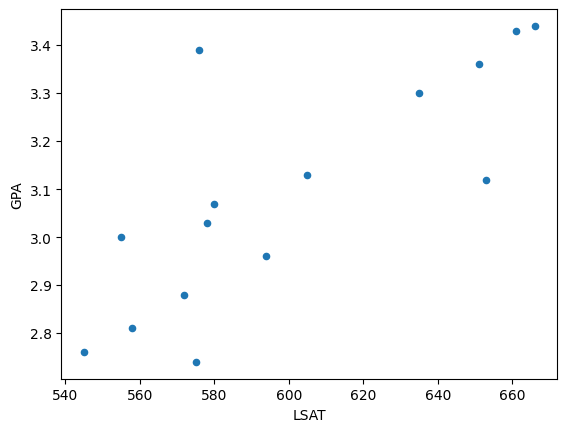

In [2]:
df = pd.read_csv("law.csv")
df.plot.scatter(x="LSAT", y="GPA")
plt.show()

## Identify outliers

In [3]:
# linear regression on df
from sklearn.linear_model import LinearRegression

X = df[["LSAT"]]
y = df["GPA"]
lm = LinearRegression()
lm.fit(X, y);

In [4]:
lm.coef_, lm.intercept_

(array([0.00452348]), 0.3793740867555022)

In [5]:
X = df[["LSAT"]]
y = X * lm.coef_ + lm.intercept_

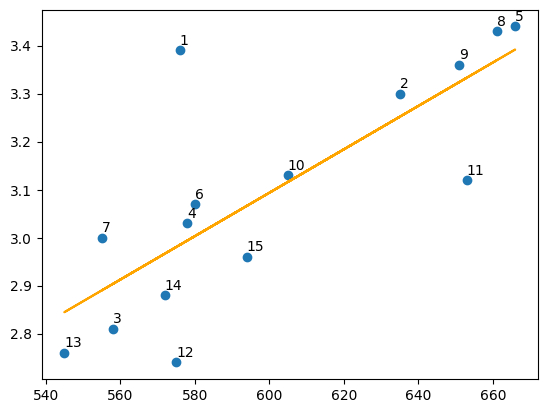

In [6]:
plt.scatter(df["LSAT"], df["GPA"])

for i in range(len(df)):
    datapoint = (df["LSAT"][i], df["GPA"][i])
    plt.annotate(i+1, datapoint, xytext=(datapoint[0], datapoint[1]+0.012))
plt.plot(X, y, color="orange")
plt.show()

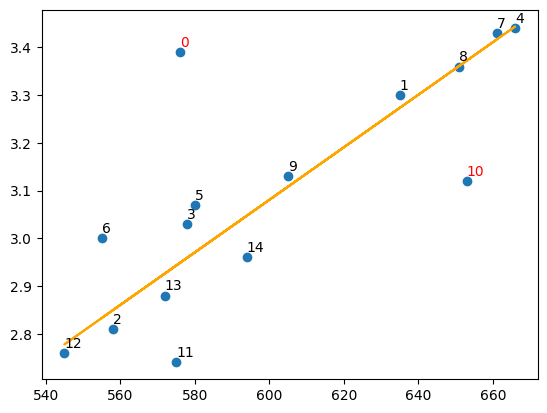

In [7]:
df_rem = df.drop([0, 10])
df_rem

from sklearn.linear_model import LinearRegression

X = df_rem[["LSAT"]]
y = df_rem["GPA"]
lm = LinearRegression()
lm.fit(X, y)

X = df_rem[["LSAT"]]
y = X * lm.coef_ + lm.intercept_

plt.scatter(df["LSAT"], df["GPA"])

for i in range(len(df)):
    datapoint = (df["LSAT"][i], df["GPA"][i])
    if i not in [0, 10]:
        plt.annotate(i, datapoint, xytext=(datapoint[0], datapoint[1]+0.012))
    else:
        plt.annotate(i, datapoint, xytext=(datapoint[0], datapoint[1]+0.012), color="red")
plt.plot(X, y, color="orange")
plt.show()

## Experiments

In [8]:
from exercise_01 import complete_enumeration_bootstrap_parallelized, complete_enumeration_bootstrap
from exercise_01 import monte_carlo_bootstrap, monte_carlo_bootstrap_histogram, plot_histogram

In [62]:
# Uncomment based on experiment:
# Baseline:
# df_removal = df
# condition = 'baseline'

# A: remove observation 0
# df_removal = df.drop([0])
# condition = 'A'

# B: remove observation 10
df_removal = df.drop([10])
condition = 'B'

# C: remove observations 0 and 10
# df_removal = df.drop([0, 10])
# condition = 'C'

In [63]:
# complete enumeration
law_complete_enumeration_removal = complete_enumeration_bootstrap_parallelized(
    lambda x: np.corrcoef(x.T)[0][1], df_removal.values, n_jobs=-1
)
np.save(f"law_complete_enumeration_removal_{condition}.npy", law_complete_enumeration_removal)

 52%|█████▏    | 11/21 [00:00<00:00, 108.74it/s]/home/alex/um/comp_stats/compstats-env/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
100%|██████████| 21/21 [00:01<00:00, 11.84it/s] 
/home/alex/um/comp_stats/compstats-env/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alex/um/comp_stats/compstats-env/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/alex/um/comp_stats/compstats-env/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alex/um/comp_stats/compstats-env/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/alex/um/comp_stat

In [64]:
# complete enumeration histogram
dist, probs = np.load(f"law_complete_enumeration_removal_{condition}.npy")
# get the bins
bins_ = np.linspace(-1, 1, 1000)
# bin the distribution
hist, _ = np.histogram(dist, bins=bins_, weights=probs)
law_complete_enumeration_hist_removal = hist, bins_

In [65]:
# monte carlo
law_monte_carlo_hist_removal = monte_carlo_bootstrap_histogram(lambda x: np.corrcoef(x.T)[0][1], df_removal.values, n=40_000)


100%|██████████| 40000/40000 [00:01<00:00, 20206.48it/s]


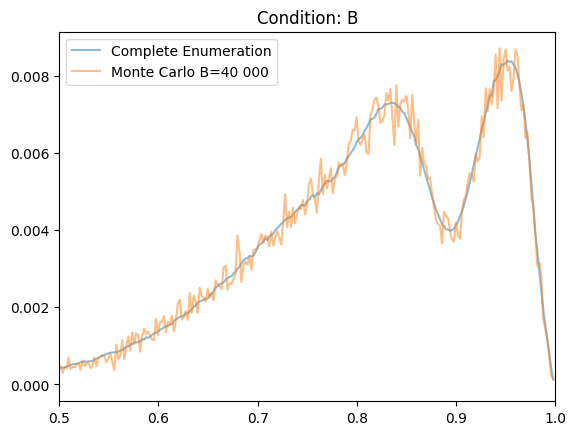

In [66]:
# visualize
fig, ax = plt.subplots()
plot_histogram(*law_complete_enumeration_hist_removal, smoothing=None, ax=ax, alpha=0.5, label="Complete Enumeration")
plot_histogram(*law_monte_carlo_hist_removal, smoothing=None, ax=ax, alpha=0.5, label="Monte Carlo B=40 000")
ax.legend()
plt.xlim(0.5, 1)
plt.title(f"Condition: {condition}")
plt.savefig(f"img/removal/removal_{condition}.png")
plt.show()

### Plot in one run

100%|██████████| 40000/40000 [00:01<00:00, 20663.39it/s]


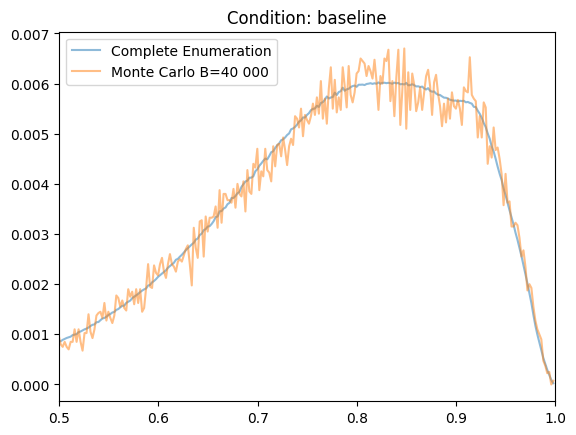

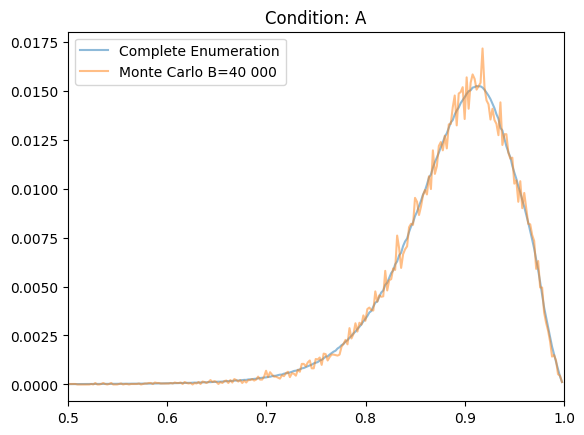

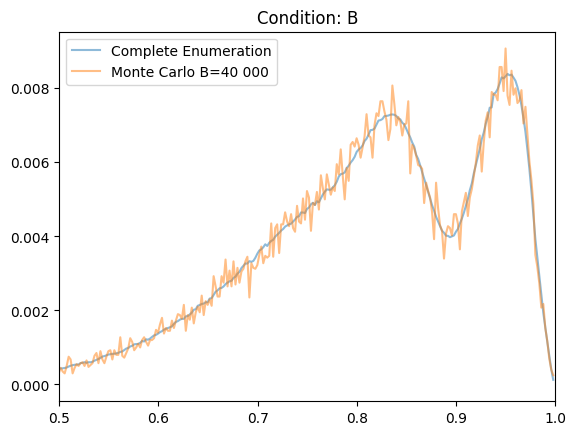

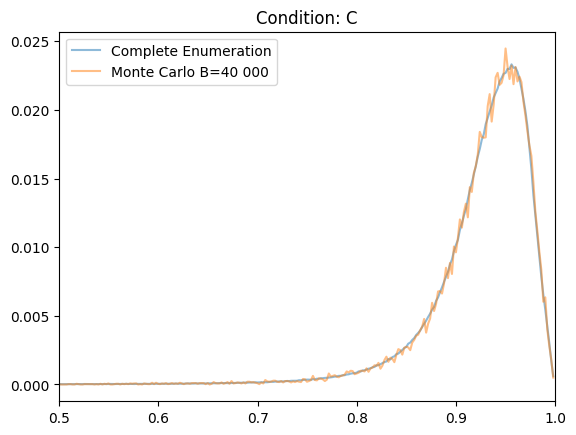

In [67]:
dropped_obs = [[], [0], [10], [0, 10]]
for i, condition in enumerate(['baseline', 'A', 'B', 'C']):
    df_removal = df.drop(dropped_obs[i])

    # complete enumeration histogram
    dist, probs = np.load(f"law_complete_enumeration_removal_{condition}.npy")
    # get the bins
    bins_ = np.linspace(-1, 1, 1000)
    # bin the distribution
    hist, _ = np.histogram(dist, bins=bins_, weights=probs)
    law_complete_enumeration_hist_removal = hist, bins_

    # monte carlo
    law_monte_carlo_hist_removal = monte_carlo_bootstrap_histogram(lambda x: np.corrcoef(x.T)[0][1], df_removal.values, n=40_000)

    # visualize
    fig, ax = plt.subplots()
    plot_histogram(*law_complete_enumeration_hist_removal, smoothing=None, ax=ax, alpha=0.5, label="Complete Enumeration")
    plot_histogram(*law_monte_carlo_hist_removal, smoothing=None, ax=ax, alpha=0.5, label="Monte Carlo B=40 000")
    ax.set_title(f'Condition: {condition}')
    ax.legend()
    plt.xlim(0.5, 1)

plt.legend()
# plt.savefig(f"img/removal/removal_all.png")
plt.show()